In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

Loading the Data

In [3]:
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\NBCData.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


Splitting the Data into Training & Testing using Scikit Learn Package

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Extract features (X) and labels (y)
X = df[['glucose','bloodpressure']]
y = df['diabetes']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading Necessary Packages of Sci-kit Learn

In [9]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [10]:
X

,glucose,bloodpressure
0,40,85
1,40,92
2,45,63
3,45,80
4,40,73
...,...,...
990,45,87
991,40,83
992,40,83
993,40,60


In [11]:
y

0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64

Code for splitting Training & Testing Datasets in proportion of (80% & 20% Respectively)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

In [13]:
gnb = GaussianNB()

Code for Prediction of y using X Train & Test Dataset

In [14]:
y_pred = gnb.fit(X_train,y_train).predict(X_test)

Code for checking Total Number of Mislabeled Points

In [15]:
print("Number of mislabeled points out of total %d points : %d"
    %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of total 199 points : 18


In [16]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

Checking Accuracy of Dataset using Naive Bayes Algorithm

In [17]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

90.95477386934674

Generating Classification Report & Confusion Matrix using Scikit Learn Package

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have the following variables:
# X_train, X_test: Features for training and testing
# y_train, y_test: Corresponding target labels for training and testing
# y_pred: Predicted labels for the test set

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9095477386934674
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        88
           1       0.94      0.89      0.92       111

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199

Confusion Matrix:
[[82  6]
 [12 99]]


Creating Heatmap on the Bases of Actual Vs Predicted Values

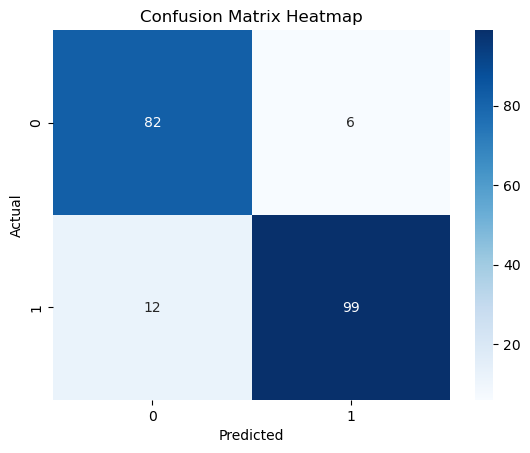

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix as 'confusion_matrix'
confusion_matrix = [[82, 6], [12, 99]]

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show the heatmap
plt.show()